In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/canadian-cheese-directory/cheese_data.csv


# **This notebook will perform Exploratory Data Analysis on the Canadian cheese directory data**

# **The goal is to predict the fat level of the cheese**

In [2]:
# Let's import the necessary modules
import matplotlib.pyplot as plt
import seaborn as sns

### Let's have a look at the data

In [3]:
data = pd.read_csv('/kaggle/input/canadian-cheese-directory/cheese_data.csv')

In [4]:
data.head()

,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),lower fat
3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,NaN,0,Veined Cheeses,Cow,Raw Milk,NaN,Geai Bleu (Le),lower fat
4,319,NB,Farmstead,49.4,Softer taste,NaN,1,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat


### The first thing we do is to randomly shuffle the data and then separate it into train and test sets


In [5]:

data = data.sample(frac=1).reset_index(drop=True)


train_size = int(np.floor(len(data) * 0.8))
train_data = data[:train_size]
test_data = data[train_size:]

In [6]:
# let's check the shape of the train and test sets

train_data.shape, test_data.shape

((833, 13), (209, 13))

# Now let's perform EDA on the train data

In [7]:
# Let's look at some information about the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CheeseId              833 non-null    int64  
 1   ManufacturerProvCode  833 non-null    object 
 2   ManufacturingTypeEn   833 non-null    object 
 3   MoisturePercent       820 non-null    float64
 4   FlavourEn             642 non-null    object 
 5   CharacteristicsEn     513 non-null    object 
 6   Organic               833 non-null    int64  
 7   CategoryTypeEn        814 non-null    object 
 8   MilkTypeEn            832 non-null    object 
 9   MilkTreatmentTypeEn   782 non-null    object 
 10  RindTypeEn            579 non-null    object 
 11  CheeseName            833 non-null    object 
 12  FatLevel              833 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 84.7+ KB


### We can see that there are a total of 1042 entries in the dataset and 13 columns
### There are some columns with some null values

In [8]:
# Let's look at some statistical information about the numerical columns
train_data.describe()

,CheeseId,MoisturePercent,Organic
count,833.000000,820.000000,833.000000
mean,1570.764706,47.235122,0.093637
std,452.736036,9.453234,0.291499
min,242.000000,12.000000,0.000000
25%,1291.000000,40.000000,0.000000
50%,1555.000000,46.000000,0.000000
75%,1908.000000,52.000000,0.000000
max,2391.000000,88.000000,1.000000


array([[<Axes: title={'center': 'CheeseId'}>,
        <Axes: title={'center': 'MoisturePercent'}>],
       [<Axes: title={'center': 'Organic'}>, <Axes: >]], dtype=object)

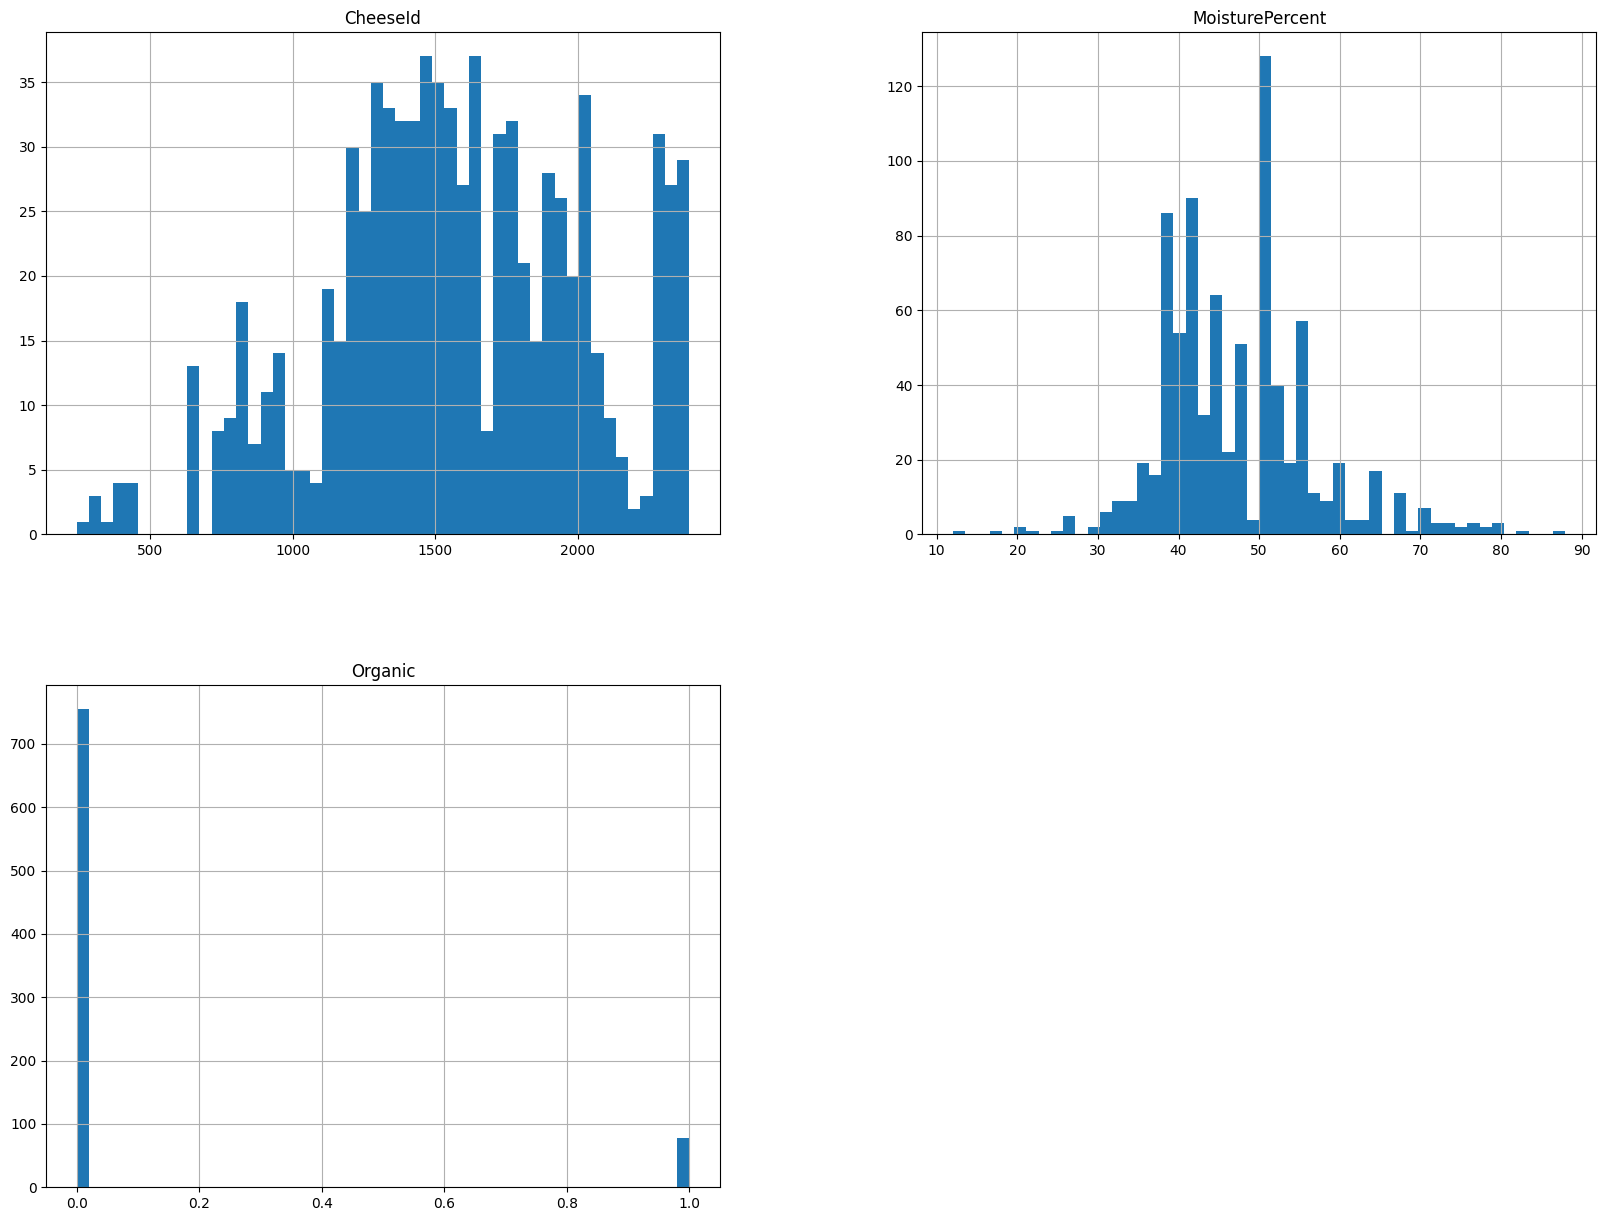

In [9]:
# Let's plot distributions of the numerical columns
train_data.hist(bins=50, figsize=(20,15))


### We can see that the moisture percentage looks like a normal distribution.

In [10]:
# Let's look at unique values in every column
train_data.nunique()

CheeseId                833
ManufacturerProvCode     10
ManufacturingTypeEn       3
MoisturePercent          61
FlavourEn               515
CharacteristicsEn       429
Organic                   2
CategoryTypeEn            6
MilkTypeEn                8
MilkTreatmentTypeEn       3
RindTypeEn                4
CheeseName              830
FatLevel                  2
dtype: int64

In [11]:
import warnings

warnings.filterwarnings("ignore")

### Looks like there are a lot of categorical columns.
### Let's look at the distribution of the categorical columns

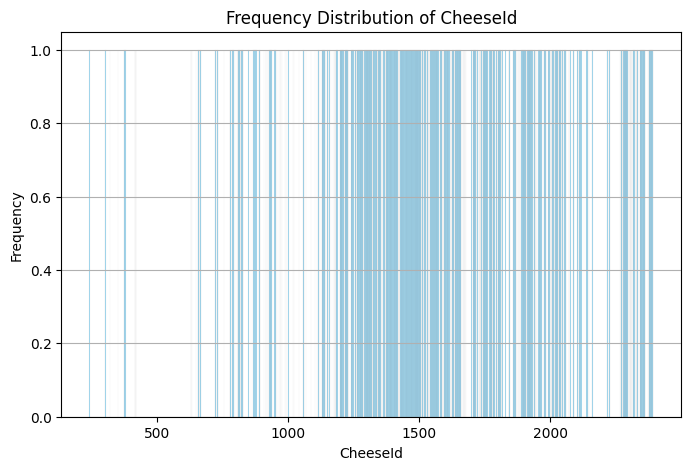

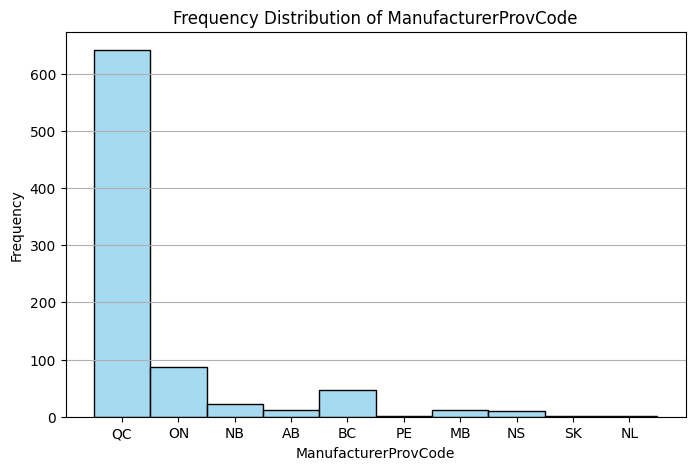

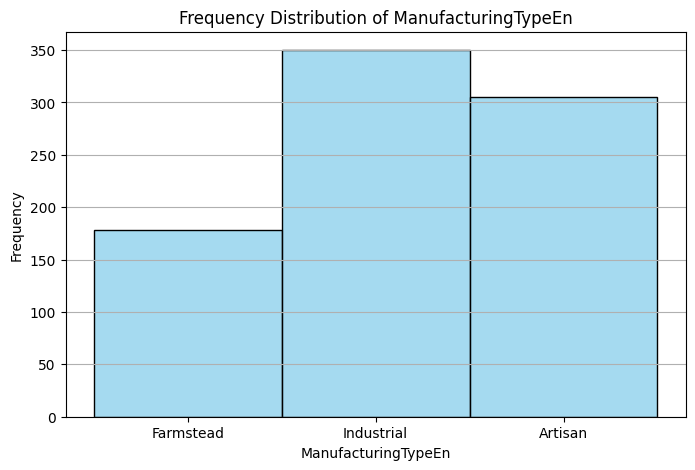

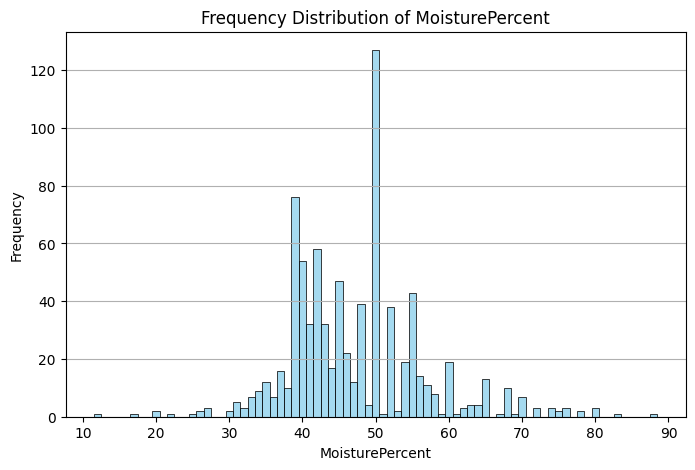

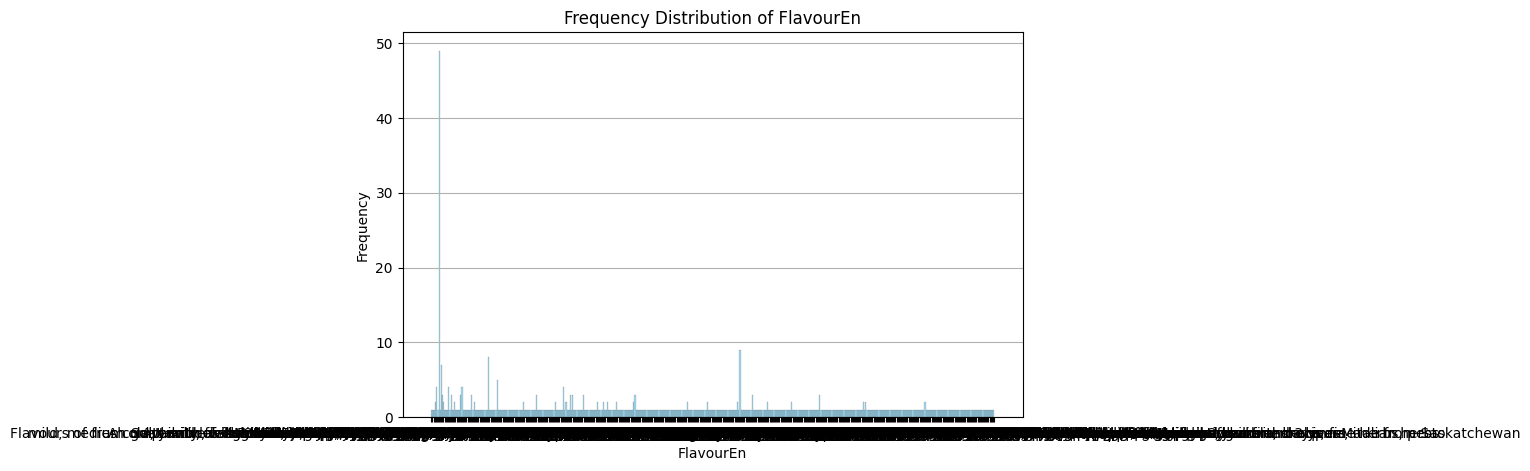

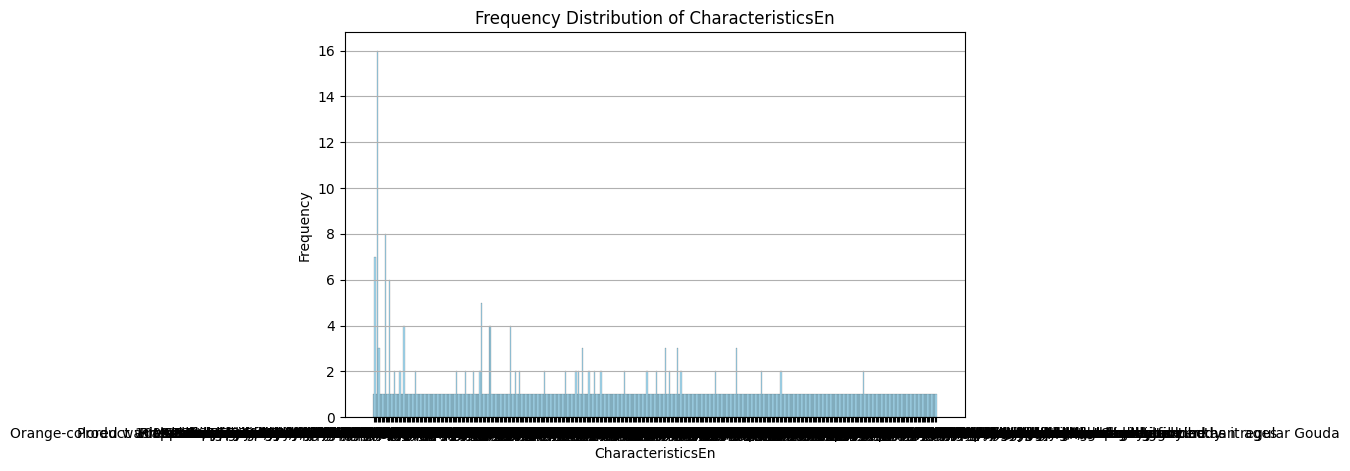

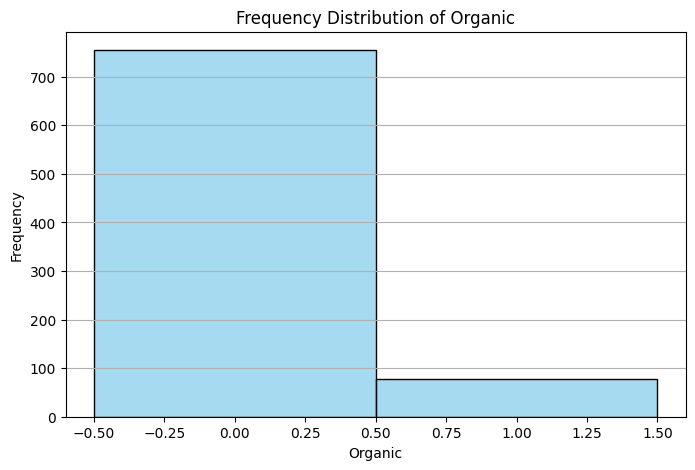

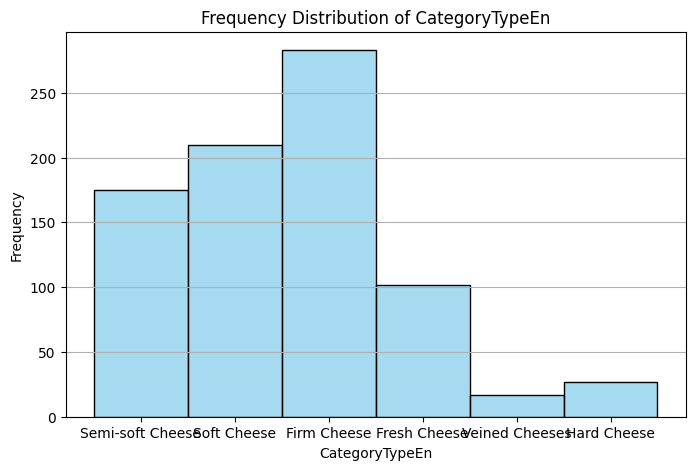

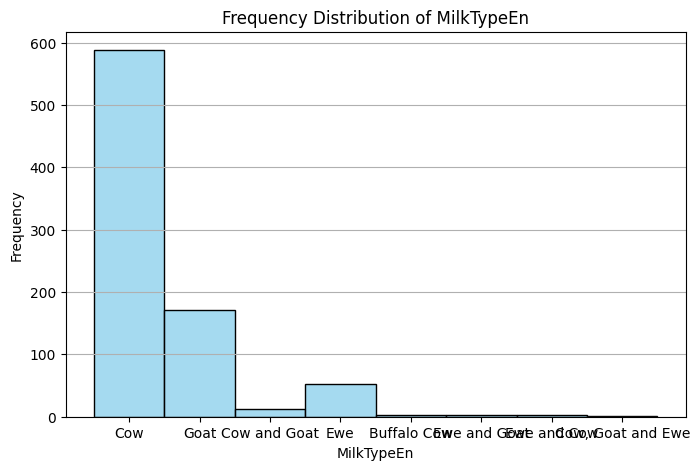

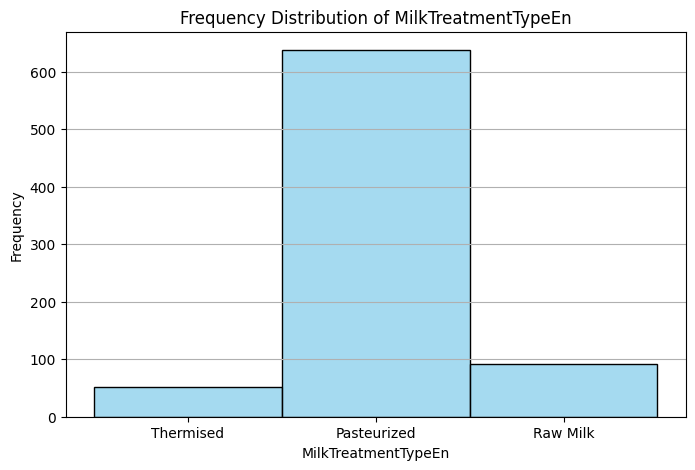

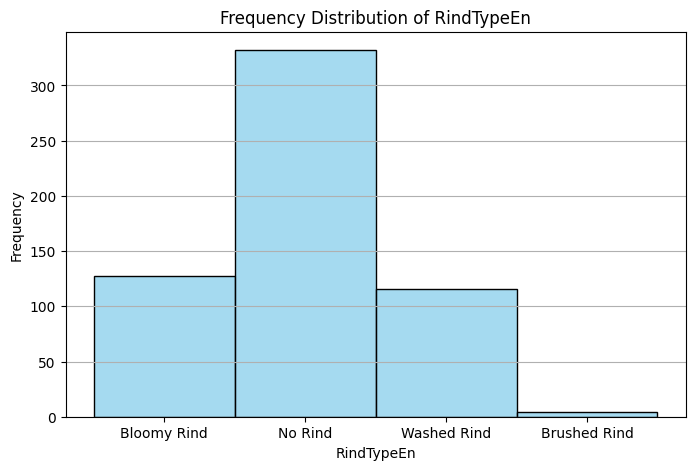

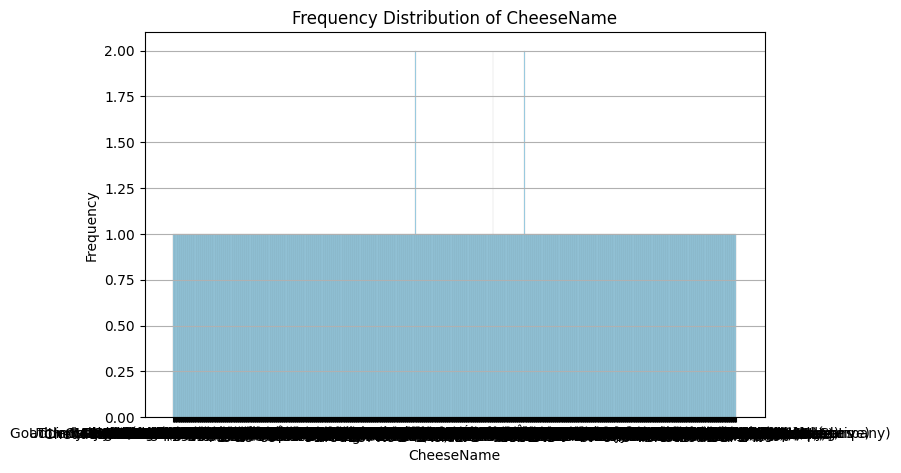

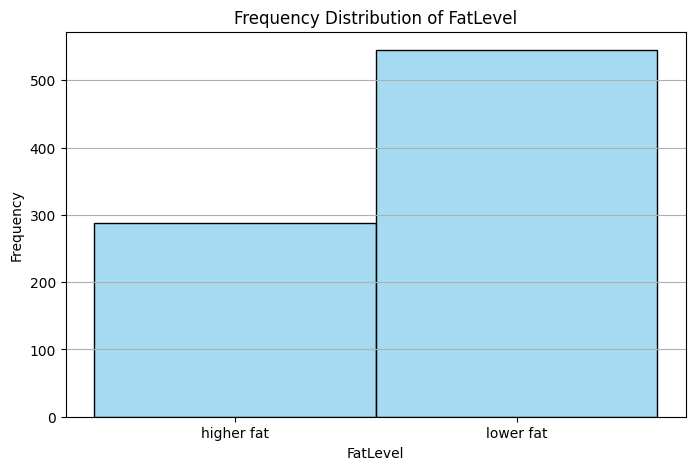

In [12]:

frequency_data = {col: train_data[col].value_counts() for col in train_data.columns}

for col in train_data.columns:
    plt.figure(figsize=(8, 5))  
    sns.histplot(data=train_data, x=col, discrete=True, stat='count', color='skyblue')
    plt.title(f'Frequency Distribution of {col}')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    
    plt.show()  



### We can see that the distribution of the columns FlavourEn, CharacteristicsEn, and CheeseName is uniform
### So let's drop the FlavourEn, CharacteristicsEn, and CheeseName columns

In [13]:
train_data = train_data.drop(columns=['FlavourEn', 'CharacteristicsEn', 'CheeseName'])

## **Also we can get some hints for feature engineering:**
 * In the distribution of ManufacturerProvCode there are 10 categories but we can engineer 4 categories i.e. QC, BC, ON,and, Others, since the frequency in QC, BC, and, ON is more than all others combined.

 * Similarly in the distribution of MilkTypeEN there are 8 categories but we can engineer 4 categories i.e. Cow, Goat, Ewe, and Others.
 
 * Similarly, in the distribution of RindTypeEn there are 4 categories but we can reduce them to 2 i.e. Rind and NoRind
 
 * The main difference between raw milk and thermized milk is that raw milk is unpasteurized, while thermized milk is a type of subpasteurized milk. So we can make two categories in MilkTreatmentTypeEn i.e. Raw and Pasteurized.
 
 ### We will view some statistics to whether or not make this new categories.

In [14]:
train_data.columns

Index(['CheeseId', 'ManufacturerProvCode', 'ManufacturingTypeEn',
       'MoisturePercent', 'Organic', 'CategoryTypeEn', 'MilkTypeEn',
       'MilkTreatmentTypeEn', 'RindTypeEn', 'FatLevel'],
      dtype='object')

### We need to replace the Nan values in MoisturePercent with the mean since it is not a categorical column


In [15]:
train_data['MoisturePercent'] = train_data['MoisturePercent'].fillna(train_data['MoisturePercent'].mean())

### We will replace Nan values in categorical columns with the mode or the most frequent value


In [16]:
columns = ['ManufacturerProvCode', 'ManufacturingTypeEn', 'MilkTypeEn', 'MilkTreatmentTypeEn', 'RindTypeEn', 'CategoryTypeEn']

for col in columns:
    train_data[col] = train_data[col].fillna(train_data[col].mode()[0])

In [17]:
# Let's encode FatLevel with 0 and 1
train_data['FatLevel'] = train_data['FatLevel'].map({'lower fat': 0, 'higher fat': 1})

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CheeseId              833 non-null    int64  
 1   ManufacturerProvCode  833 non-null    object 
 2   ManufacturingTypeEn   833 non-null    object 
 3   MoisturePercent       833 non-null    float64
 4   Organic               833 non-null    int64  
 5   CategoryTypeEn        833 non-null    object 
 6   MilkTypeEn            833 non-null    object 
 7   MilkTreatmentTypeEn   833 non-null    object 
 8   RindTypeEn            833 non-null    object 
 9   FatLevel              833 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 65.2+ KB


In [19]:
# Now let's convert all the categorical columns to their one hot encoded version

new_train_data = pd.get_dummies(train_data, columns=columns, drop_first=False)


In [20]:
new_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CheeseId                         833 non-null    int64  
 1   MoisturePercent                  833 non-null    float64
 2   Organic                          833 non-null    int64  
 3   FatLevel                         833 non-null    int64  
 4   ManufacturerProvCode_AB          833 non-null    bool   
 5   ManufacturerProvCode_BC          833 non-null    bool   
 6   ManufacturerProvCode_MB          833 non-null    bool   
 7   ManufacturerProvCode_NB          833 non-null    bool   
 8   ManufacturerProvCode_NL          833 non-null    bool   
 9   ManufacturerProvCode_NS          833 non-null    bool   
 10  ManufacturerProvCode_ON          833 non-null    bool   
 11  ManufacturerProvCode_PE          833 non-null    bool   
 12  ManufacturerProvCode_Q

In [21]:
# Let's have a look at the data now
new_train_data.head()

,CheeseId,MoisturePercent,Organic,FatLevel,ManufacturerProvCode_AB,ManufacturerProvCode_BC,ManufacturerProvCode_MB,ManufacturerProvCode_NB,ManufacturerProvCode_NL,ManufacturerProvCode_NS,...,RindTypeEn_Bloomy Rind,RindTypeEn_Brushed Rind,RindTypeEn_No Rind,RindTypeEn_Washed Rind,CategoryTypeEn_Firm Cheese,CategoryTypeEn_Fresh Cheese,CategoryTypeEn_Hard Cheese,CategoryTypeEn_Semi-soft Cheese,CategoryTypeEn_Soft Cheese,CategoryTypeEn_Veined Cheeses
0,1514,43.0,0,1,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,1364,54.0,0,0,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1382,43.0,0,0,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
3,1497,48.0,0,0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4,1500,50.0,0,0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [22]:
# Now let's make Cheeseid the index
new_train_data.set_index('CheeseId', inplace=True)
new_train_data

,MoisturePercent,Organic,FatLevel,ManufacturerProvCode_AB,ManufacturerProvCode_BC,ManufacturerProvCode_MB,ManufacturerProvCode_NB,ManufacturerProvCode_NL,ManufacturerProvCode_NS,ManufacturerProvCode_ON,...,RindTypeEn_Bloomy Rind,RindTypeEn_Brushed Rind,RindTypeEn_No Rind,RindTypeEn_Washed Rind,CategoryTypeEn_Firm Cheese,CategoryTypeEn_Fresh Cheese,CategoryTypeEn_Hard Cheese,CategoryTypeEn_Semi-soft Cheese,CategoryTypeEn_Soft Cheese,CategoryTypeEn_Veined Cheeses
CheeseId,,,,,,,,,,,,,,,,,,,,,
1514,43.000000,0,1,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1364,54.000000,0,0,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
1382,43.000000,0,0,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
1497,48.000000,0,0,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1500,50.000000,0,0,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,55.000000,0,0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
350,48.000000,0,0,False,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
1793,70.000000,0,0,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False


In [23]:
# Now Let's split the data into training examples X and target variable y
train_x = new_train_data.drop(columns=['FatLevel'])
train_y = new_train_data['FatLevel']

## Now let's check some stats to ensure correct feature engineering!
* We check the ratio of QC, BC, ON V/S others in ManufacturerProvCode
* Check the ratio of Cow, Goat, Ewe V/S others in MilkTypeEN
* Check the ratio of Rind V/S others in RindTypeEn
* Check the ratio of Raw V/S others in  MilkTreatmentTypeEn

In [24]:
MPC_QC_ratio = train_x['ManufacturerProvCode_QC'].sum()/len(train_x['ManufacturerProvCode_QC'])
MPC_BC_ratio = train_x['ManufacturerProvCode_BC'].sum()/len(train_x['ManufacturerProvCode_BC'])
MPC_ON_ratio = train_x['ManufacturerProvCode_ON'].sum()/len(train_x['ManufacturerProvCode_ON'])
MPC_other_ratio = 1 - (MPC_QC_ratio + MPC_BC_ratio + MPC_ON_ratio)

MT_C_ratio = train_x['MilkTypeEn_Cow'].sum()/len(train_x['MilkTypeEn_Cow'])
MT_G_ratio = train_x['MilkTypeEn_Goat'].sum()/len(train_x['MilkTypeEn_Goat'])
MT_E_ratio = train_x['MilkTypeEn_Ewe'].sum()/len(train_x['MilkTypeEn_Ewe'])
MT_other_ratio = 1 - (MT_C_ratio + MT_G_ratio + MT_E_ratio)

No_Rind_ratio = train_x['RindTypeEn_No Rind'].sum()/len(train_x['RindTypeEn_No Rind'])
Rind_ratio = 1 - No_Rind_ratio

MTT_Raw_ratio = train_x['MilkTreatmentTypeEn_Raw Milk'].sum()/len(train_x['MilkTreatmentTypeEn_Raw Milk'])
MTT_other_ratio = 1 - MTT_Raw_ratio

print(f"The ratio of QC, BC, and ON in ManufacturerProvCode is: {round(MPC_QC_ratio, 2)}, {round(MPC_BC_ratio, 2)}, {round(MPC_ON_ratio, 2)}\n")
print(f"The ratio of others in ManufacturerProvCode is: {round(MPC_other_ratio, 2)}\n\n")

print(f"The ratio of Cow, Goat, and Ewe in MilkTypeEn is: {round(MT_C_ratio, 2)}, {round(MT_G_ratio, 2)}, {round(MT_E_ratio, 2)}\n")
print(f"The ratio of others in MilkTypeEn is: {round(MT_other_ratio, 2)}\n\n")

print(f"The ratio of Rind in RindTypeEn is: {round(Rind_ratio, 2)}\n")
print(f"The ratio of NoRind in RindTypeEn is: {round(No_Rind_ratio, 2)}\n\n")

print(f"The ratio of Raw in MilkTreatmentTypeEn is: {round(MTT_Raw_ratio, 2)}\n")
print(f"The ratio of others in MilkTreatmentTypeEn is: {round(MTT_other_ratio, 2)}\n\n")

The ratio of QC, BC, and ON in ManufacturerProvCode is: 0.77, 0.06, 0.1

The ratio of others in ManufacturerProvCode is: 0.07


The ratio of Cow, Goat, and Ewe in MilkTypeEn is: 0.71, 0.21, 0.06

The ratio of others in MilkTypeEn is: 0.03


The ratio of Rind in RindTypeEn is: 0.3

The ratio of NoRind in RindTypeEn is: 0.7


The ratio of Raw in MilkTreatmentTypeEn is: 0.11

The ratio of others in MilkTreatmentTypeEn is: 0.89




## Now let's perform some feature engineering to reduce some features as discussed above:

* Make four categories in ManufacturerProvCode i.e. QC, BC, ON,and, Others
* Make four categories in MilkTypeEn i.e. Cow, Goat, Ewe, and Others
* Make two categories in RindTypeEn i.e. Rind and No_Rind
* Make two categories in MilkTreatmentTypeEn i.e. Raw and Pasteurized.

In [25]:
MPC_others = ['ManufacturerProvCode_AB', 
              'ManufacturerProvCode_MB', 
              'ManufacturerProvCode_NB', 
              'ManufacturerProvCode_NL', 
              'ManufacturerProvCode_NS', 
              'ManufacturerProvCode_PE', 
              'ManufacturerProvCode_SK']
MPC_other_df = train_x[MPC_others]
MPC_other_df['ManufacturerProvCode_others'] = MPC_other_df.sum(axis=1)
MPC_other_df.drop(columns = MPC_others, inplace=True)

In [26]:
MPC_other_df

,ManufacturerProvCode_others
CheeseId,
1514,0
1364,0
1382,0
1497,0
1500,0
...,...
1482,0
350,1
1793,0


In [27]:
MT_others = ['MilkTypeEn_Buffalo Cow', 
              'MilkTypeEn_Cow and Goat', 
              'MilkTypeEn_Cow, Goat and Ewe', 
              'MilkTypeEn_Ewe and Cow', 
              'MilkTypeEn_Ewe and Goat']
MT_other_df = train_x[MT_others]
MT_other_df['MilkTypeEn_others'] = MT_other_df.sum(axis=1)
MT_other_df.drop(columns = MT_others, inplace=True)

In [28]:
MT_other_df

,MilkTypeEn_others
CheeseId,
1514,0
1364,0
1382,0
1497,0
1500,0
...,...
1482,0
350,0
1793,0


In [29]:
Rind_cols = ['RindTypeEn_Bloomy Rind', 
              'RindTypeEn_Brushed Rind', 
              'RindTypeEn_Washed Rind']
Rind_df = train_x[Rind_cols]
Rind_df['RindTypeEn_Rind'] = Rind_df.sum(axis=1)
Rind_df.drop(columns = Rind_cols, inplace=True)

In [30]:
Rind_df

,RindTypeEn_Rind
CheeseId,
1514,0
1364,1
1382,0
1497,1
1500,1
...,...
1482,0
350,0
1793,0


In [31]:
MTT = ['MilkTreatmentTypeEn_Pasteurized', 
              'MilkTreatmentTypeEn_Thermised']
MTT_df = train_x[MTT]
MTT_df['MilkTreatmentType_Pasteurized'] = MTT_df.sum(axis=1)
MTT_df.drop(columns = MTT, inplace=True)

In [32]:
MTT_df

,MilkTreatmentType_Pasteurized
CheeseId,
1514,1
1364,1
1382,1
1497,1
1500,1
...,...
1482,1
350,1
1793,1


In [33]:
# Let's add these new features to our train set and drop unwanted ones

new_train_x = pd.concat([train_x, MPC_other_df, MT_other_df, Rind_df, MTT_df], axis=1)

drop_cols = ['ManufacturerProvCode_AB', 
              'ManufacturerProvCode_MB', 
              'ManufacturerProvCode_NB', 
              'ManufacturerProvCode_NL', 
              'ManufacturerProvCode_NS', 
              'ManufacturerProvCode_PE', 
              'ManufacturerProvCode_SK',
            'MilkTypeEn_Buffalo Cow', 
              'MilkTypeEn_Cow and Goat', 
              'MilkTypeEn_Cow, Goat and Ewe', 
              'MilkTypeEn_Ewe and Cow', 
              'MilkTypeEn_Ewe and Goat',
            'RindTypeEn_Bloomy Rind', 
              'RindTypeEn_Brushed Rind', 
              'RindTypeEn_Washed Rind',
            'MilkTreatmentTypeEn_Pasteurized', 
              'MilkTreatmentTypeEn_Thermised']

In [34]:
new_train_x.drop(columns = drop_cols, inplace = True)
new_train_x

,MoisturePercent,Organic,ManufacturerProvCode_BC,ManufacturerProvCode_ON,ManufacturerProvCode_QC,ManufacturingTypeEn_Artisan,ManufacturingTypeEn_Farmstead,ManufacturingTypeEn_Industrial,MilkTypeEn_Cow,MilkTypeEn_Ewe,...,CategoryTypeEn_Firm Cheese,CategoryTypeEn_Fresh Cheese,CategoryTypeEn_Hard Cheese,CategoryTypeEn_Semi-soft Cheese,CategoryTypeEn_Soft Cheese,CategoryTypeEn_Veined Cheeses,ManufacturerProvCode_others,MilkTypeEn_others,RindTypeEn_Rind,MilkTreatmentType_Pasteurized
CheeseId,,,,,,,,,,,,,,,,,,,,,
1514,43.000000,0,False,False,True,False,True,False,True,False,...,False,False,False,True,False,False,0,0,0,1
1364,54.000000,0,False,False,True,False,False,True,True,False,...,False,False,False,False,True,False,0,0,1,1
1382,43.000000,0,False,False,True,False,False,True,True,False,...,True,False,False,False,False,False,0,0,0,1
1497,48.000000,0,False,False,True,True,False,False,True,False,...,False,False,False,True,False,False,0,0,1,1
1500,50.000000,0,False,False,True,True,False,False,True,False,...,False,False,False,False,True,False,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,55.000000,0,False,False,True,True,False,False,False,False,...,False,False,False,True,False,False,0,0,0,1
350,48.000000,0,False,False,False,False,False,True,True,False,...,False,True,False,False,False,False,1,0,0,1
1793,70.000000,0,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,0,0,0,1


In [35]:
# Converting boolean values to integers
new_train_x = new_train_x.astype({col: 'int' for col in new_train_x.select_dtypes(include='bool').columns})
new_train_x

,MoisturePercent,Organic,ManufacturerProvCode_BC,ManufacturerProvCode_ON,ManufacturerProvCode_QC,ManufacturingTypeEn_Artisan,ManufacturingTypeEn_Farmstead,ManufacturingTypeEn_Industrial,MilkTypeEn_Cow,MilkTypeEn_Ewe,...,CategoryTypeEn_Firm Cheese,CategoryTypeEn_Fresh Cheese,CategoryTypeEn_Hard Cheese,CategoryTypeEn_Semi-soft Cheese,CategoryTypeEn_Soft Cheese,CategoryTypeEn_Veined Cheeses,ManufacturerProvCode_others,MilkTypeEn_others,RindTypeEn_Rind,MilkTreatmentType_Pasteurized
CheeseId,,,,,,,,,,,,,,,,,,,,,
1514,43.000000,0,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1364,54.000000,0,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,1
1382,43.000000,0,0,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
1497,48.000000,0,0,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
1500,50.000000,0,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,55.000000,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
350,48.000000,0,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
1793,70.000000,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [36]:
# Let's Normalize moisture percentage so that it takes values from 0 through 1
new_train_x['MoisturePercent'] = new_train_x['MoisturePercent']/100
new_train_x

,MoisturePercent,Organic,ManufacturerProvCode_BC,ManufacturerProvCode_ON,ManufacturerProvCode_QC,ManufacturingTypeEn_Artisan,ManufacturingTypeEn_Farmstead,ManufacturingTypeEn_Industrial,MilkTypeEn_Cow,MilkTypeEn_Ewe,...,CategoryTypeEn_Firm Cheese,CategoryTypeEn_Fresh Cheese,CategoryTypeEn_Hard Cheese,CategoryTypeEn_Semi-soft Cheese,CategoryTypeEn_Soft Cheese,CategoryTypeEn_Veined Cheeses,ManufacturerProvCode_others,MilkTypeEn_others,RindTypeEn_Rind,MilkTreatmentType_Pasteurized
CheeseId,,,,,,,,,,,,,,,,,,,,,
1514,0.430000,0,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1364,0.540000,0,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,1
1382,0.430000,0,0,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
1497,0.480000,0,0,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
1500,0.500000,0,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,0.550000,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
350,0.480000,0,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
1793,0.700000,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


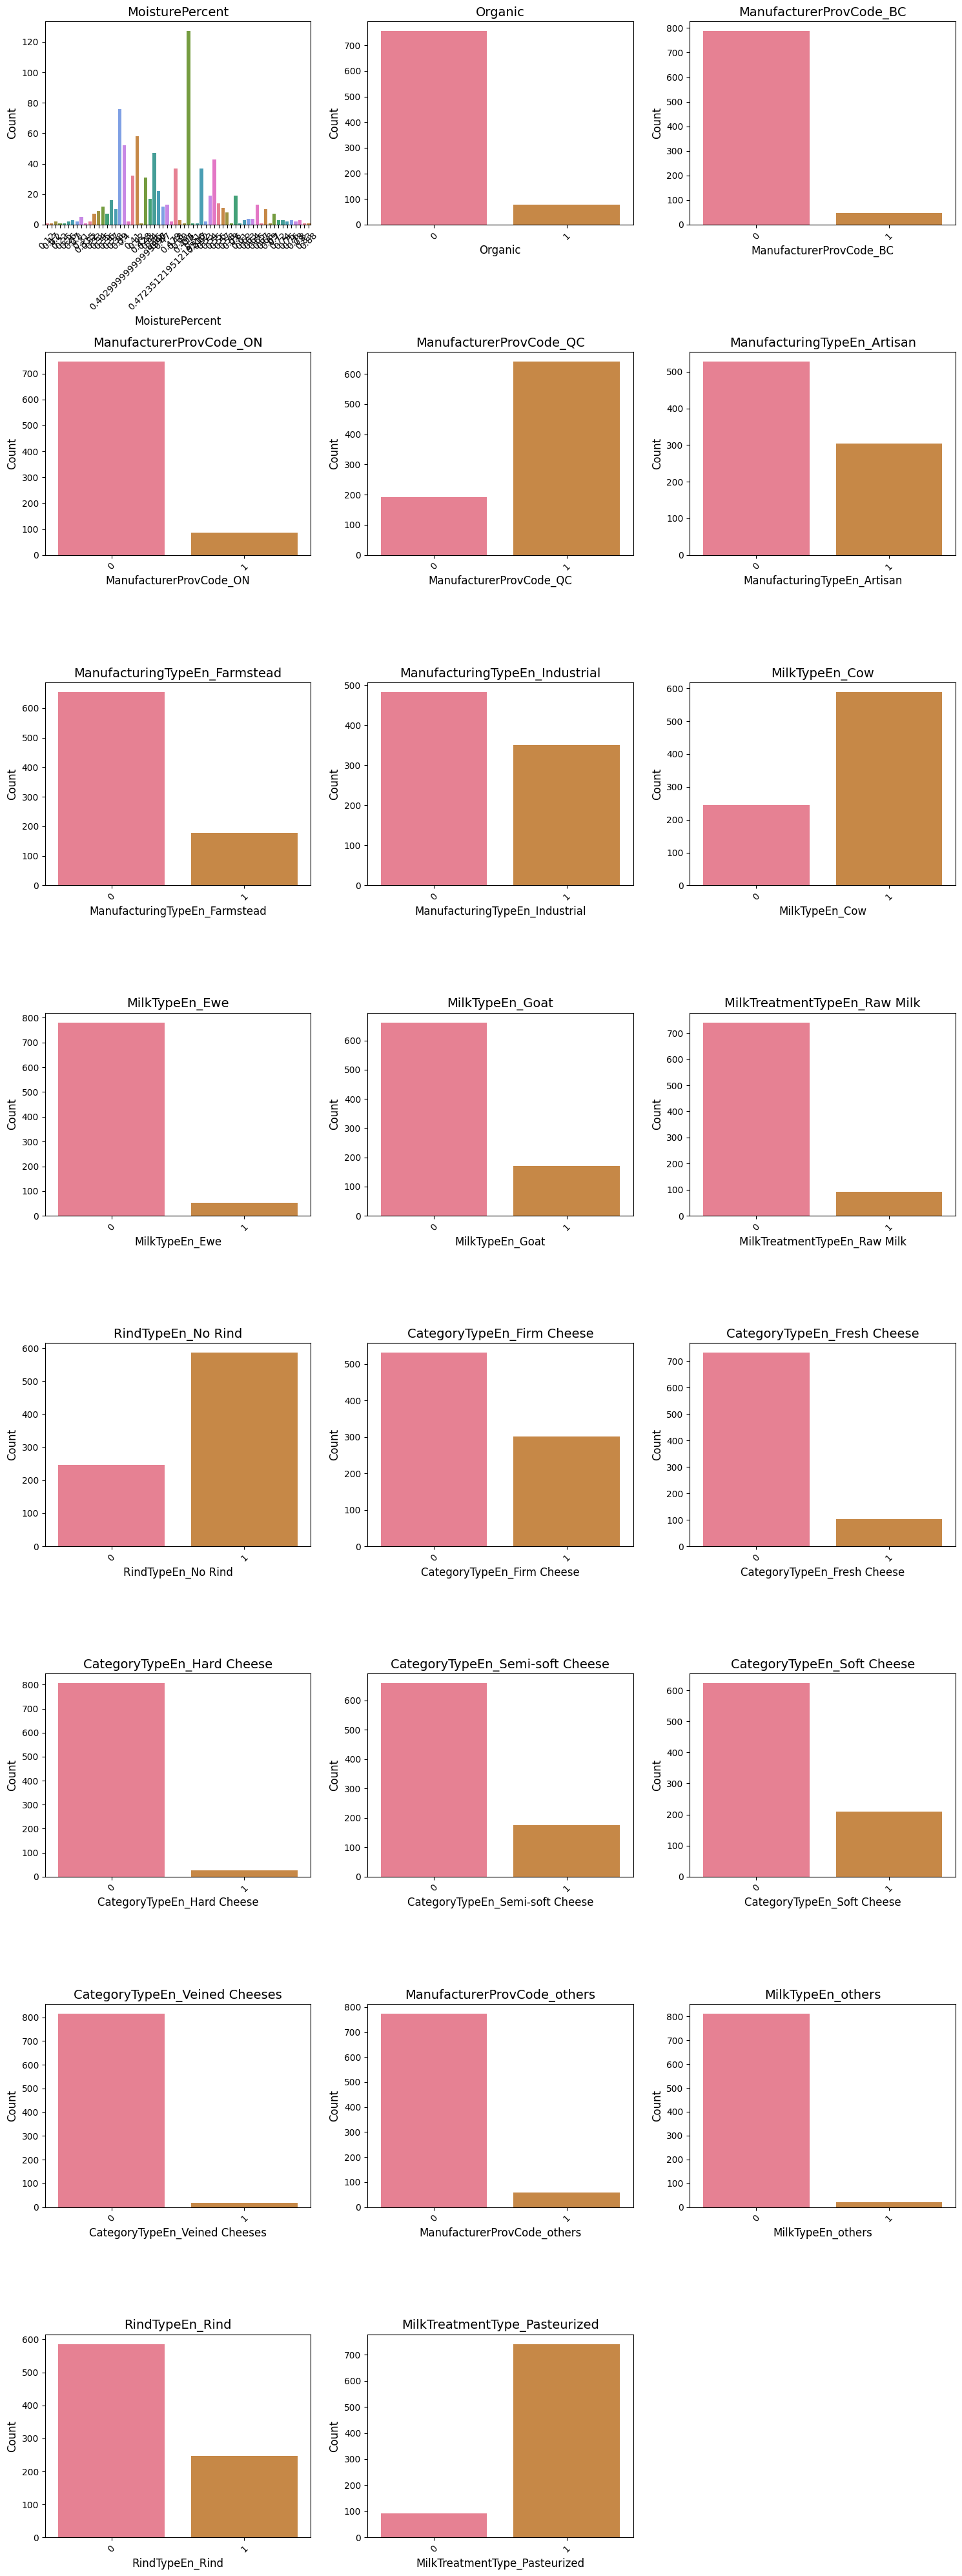

In [37]:
# Now let's plot the distribution of each column in the new training set in one plot with 3 plots in a row using sns

num_cols = len(new_train_x.columns)
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed for 3 columns

# Create subplots with the calculated number of rows and 3 columns
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Set a color palette for better aesthetics
palette = sns.color_palette("husl", n_colors=10)  # Change "husl" to any other palette you like

# Loop through each column and create a countplot
for i, col in enumerate(new_train_x.columns):
    sns.countplot(x=col, data=new_train_x, ax=axes[i], palette=palette)
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## These features look quite good to feed into the model

<Axes: xlabel='MoisturePercent'>

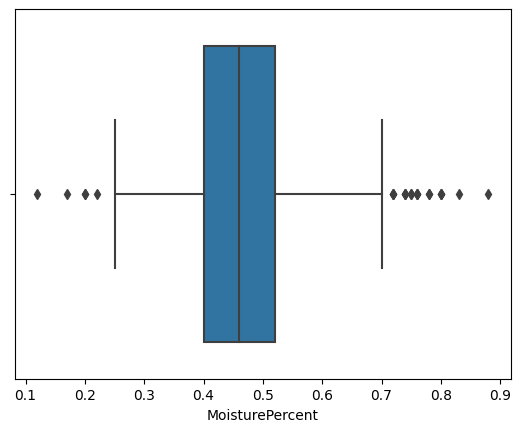

In [38]:
# Let's make a box plot to visualize the outliers in the column MoisturePercent

sns.boxplot(x=new_train_x['MoisturePercent'])

In [39]:
# Now let's detect the outliers in MoisturePercent using iqr and make a boxplot

Q1 = new_train_x['MoisturePercent'].quantile(0.25)
Q3 = new_train_x['MoisturePercent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = new_train_x[(new_train_x['MoisturePercent'] < lower_bound) | (new_train_x['MoisturePercent'] > upper_bound)]
len(outliers)

23

In [40]:
# Ohh, not many outliers, let's remove them
new_train_x = new_train_x.drop(outliers.index)

In [41]:
train_y = train_y.drop(outliers.index)

In [42]:
len(new_train_x)

810

## Let's apply all the above transformations to the test set except removing the outliers and filling the null values in MoisturePercent with the mean of MoisturePerent of the train set.

In [43]:
test_data = test_data.drop(columns=['FlavourEn', 'CharacteristicsEn', 'CheeseName'])
test_data['MoisturePercent'] = test_data['MoisturePercent'].fillna(train_data['MoisturePercent'].mean())

In [44]:
for col in columns:
    test_data[col] = test_data[col].fillna(train_data[col].mode()[0])

In [45]:
test_data['FatLevel'] = test_data['FatLevel'].map({'lower fat': 0, 'higher fat': 1})
new_test_data = pd.get_dummies(test_data, columns=columns, drop_first=False)
new_test_data.set_index('CheeseId', inplace=True)

In [46]:
for col in new_train_data.columns:
    if col in new_test_data.columns:
        pass
    else:
        new_test_data[col] = 0

In [47]:
test_x = new_test_data.drop(columns=['FatLevel'])
test_y = new_test_data['FatLevel']

In [48]:
MPC_other_df_test = test_x[MPC_others]
MPC_other_df_test['ManufacturerProvCode_others'] = MPC_other_df_test.sum(axis=1)
MPC_other_df_test.drop(columns = MPC_others, inplace=True)

In [49]:
MT_other_df_test = test_x[MT_others]
MT_other_df_test['MilkTypeEn_others'] = MT_other_df_test.sum(axis=1)
MT_other_df_test.drop(columns = MT_others, inplace=True)

In [50]:
Rind_df_test = test_x[Rind_cols]
Rind_df_test['RindTypeEn_Rind'] = Rind_df_test.sum(axis=1)
Rind_df_test.drop(columns = Rind_cols, inplace=True)


MTT_df_test = test_x[MTT]
MTT_df_test['MilkTreatmentType_Pasteurized'] = MTT_df_test.sum(axis=1)
MTT_df_test.drop(columns = MTT, inplace=True)

In [51]:
new_test_x = pd.concat([test_x, MPC_other_df_test, MT_other_df_test, Rind_df_test, MTT_df_test], axis=1)

new_test_x.drop(columns = drop_cols, inplace = True)

new_test_x = new_test_x.astype({col: 'int' for col in new_test_x.select_dtypes(include='bool').columns})

new_test_x['MoisturePercent'] = new_test_x['MoisturePercent']/100

In [52]:
new_train_x.shape, train_y.shape, new_test_x.shape, test_y.shape

((810, 23), (810,), (209, 23), (209,))

In [53]:
new_train_x.to_pickle("/kaggle/working/new_train_x.pkl")
new_test_x.to_pickle("/kaggle/working/new_test_x.pkl")
train_y.to_pickle("/kaggle/working/train_y.pkl")
test_y.to_pickle("/kaggle/working/test_y.pkl")